# Project 1: The College Scorecard. Due Sunday, October 28th at 11:59pm
Before you begin, execute the following cell to load the provided tests.

In [1]:
from datascience import *

import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')

import numpy as np

from client.api.notebook import Notebook
ok = Notebook('project01.ok')
_ = ok.auth(inline=True)

In this project, you'll explore the [college scorecard data](https://collegescorecard.ed.gov/data/), which began as an initiative to focus college ranking on financial considerations in addition to academic considerations. This dataset was last updated September 28, 2018. The project will build an understanding of 
* the US college landscape, 
* the cost of colleges in relation to students' future earnings and debt,
* and school's SAT scores in relation to gradution rates and student profiles.

The datasets in this project consist of real-world data, cleaned slighty for ease of use. As such, there are occasional anomalies that you'll have to look out for and handle specially. You are encouraged to ask your own questions and try to answer them using these datasets!

### Logistics

**Deadline.** This project is due at **11:59pm on Sunday 10/28**. It's much better to be early than late, so start working now.

**Free Response Questions**: The free response questions and plots for the project are **optional** and ungraded, meaning you do **not** need to submit a PDF of this notebook to Gradescope. These questions tend to be open-ended. However, these questions will be very good practice for the free-response exam questions, so do give them a good effort. Solutions will be posted after the project deadline.

**Partners.** You may work with one other partner; only one of you is required to submit the project. On okpy.org, the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers or code. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, send a private Piazza post to instructors for help.

**Tests.** The tests that are given are not comprehensive and passing the tests for a question does not mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, DO NOT reuse the variable names that we use when we grade your answers, otherwise there is the chance that our tests will grade against a variable that's not what you intened (especially if you run the notebook out of order!).

You never have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!

## 1. Basic Analysis: Understanding the US college landscape

```
UNITID                 Unit ID for institution
INSTNM                 Institution name
CITY                   City
STABBR                 State postcode
PREDDEG                Predominant undergraduate degree awarded
                           1 Predominantly certificate-degree granting
                           2 Predominantly associate's-degree granting
                           3 Predominantly bachelor's-degree granting
CONTROL                Control of institution
RELAFFIL               Religous affiliation of the institution
DISTANCEONLY           Flag for distance-education-only education
UGDS                   Enrollment of undergraduate certificate/degree-seeking students
UGDS_NRA               Total share of enrollment of undergraduate degree-seeking students who are non-resident aliens
PCTPELL                Percentage of undergraduates who receive a Pell Grant
PCTFLOAN               Percent of all undergraduate students receiving a federal student loan
```

### Goals of the section

This section attempts to understand the landscape of US college populations. You will explore the meaning and makeup of the fields listed above.

First, load the school information found in the file `data/csc_basic.csv` into a Table called `schools`.

In [2]:
schools = Table.read_table('data/csc_basic.csv')
schools

UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN
100654,Alabama A & M University,Normal,AL,3,1,4616,0,0,0.0065,0.7039,0.7667
100663,University of Alabama at Birmingham,Birmingham,AL,3,1,12047,0,0,0.0179,0.3525,0.5179
100690,Amridge University,Montgomery,AL,3,2,293,1,1,0,0.6971,0.8436
100706,University of Alabama in Huntsville,Huntsville,AL,3,1,6346,0,0,0.0303,0.2949,0.4312
100724,Alabama State University,Montgomery,AL,3,1,4704,0,0,0.0159,0.7815,0.8113
100751,The University of Alabama,Tuscaloosa,AL,3,1,31663,0,0,0.0192,0.1938,0.4007
100760,Central Alabama Community College,Alexander City,AL,2,1,1492,0,0,0.002,0.5109,0.3234
100812,Athens State University,Athens,AL,3,1,2888,0,0,0.001,0.4219,0.6455
100830,Auburn University at Montgomery,Montgomery,AL,3,1,4171,0,0,0.0412,0.4405,0.5565
100858,Auburn University,Auburn,AL,3,1,22095,0,0,0.0214,0.1532,0.328


**Question 1.** How many students are enrolled as undergraduates across the entire US? Assign your answer to the name `total_students`.

In [3]:
# how many college students enrolled in US
total_students = schools.column('UGDS').sum()
total_students

15625292.0

In [4]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Institutions by type of degree awarded

The field `PREDDEG` describes the "predominant undergraduate degree awarded" from the listed institution. An explanation of the values for `PREDDEG` are given in the field descriptions at the top of the section. Create tables `bachelors`, `associates`, `certificates` containing schools whose primary degree awarded are bachelor degrees, associate degrees, and certificates respectively.

In [4]:
bachelors = schools.where('PREDDEG', 3)
associates = schools.where('PREDDEG', 2)
certificate = schools.where('PREDDEG', 1)

To understand the profiles of colleges that primarily award these degrees, we'll calculate statistics on each of the tables above.

**Question 2.** Create three arrays, each of which has size 3:
1. An array called `number_of_schools` of the number of colleges of bachelor, associate, certificate degree granting types (in that order).
2. An array called `pct_of_students` containing the percentage of undergraduate students enrolled in bachelor, associate, certificate degree granting types (in that order).
3. An array called `avg_size` containing the average size of the undergraduate population at colleges of bachelor, associate, certificate degree granting types (in that order).

In [5]:
number_of_schools = make_array(
    bachelors.num_rows,
    associates.num_rows,
    certificate.num_rows
)

pct_of_students = make_array(
    bachelors.column('UGDS').sum() / total_students * 100,
    associates.column('UGDS').sum() / total_students * 100,
    certificate.column('UGDS').sum() / total_students * 100
)

avg_size = make_array(
    bachelors.column('UGDS').mean(),
    associates.column('UGDS').mean(),
    certificate.column('UGDS').mean(),
)

In [7]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Display these statistics in a table named `basic_stats`, with columns "School Type", "Number of Schools", "Percentage of College Students", and "Average Size of School"

In [6]:
basic_stats = Table().with_columns(
    'School Type', make_array('bachelors', 'associates', 'certificate'),
    'Number of Schools', number_of_schools,
    'Percentage of College Students', pct_of_students,
    'Average Size of School', avg_size
)
basic_stats

School Type,Number of Schools,Percentage of College Students,Average Size of School
bachelors,2106,58.177,4316.4
associates,1289,30.2389,3665.57
certificate,3032,11.584,596.979


In [9]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** What do you think the "typical" US school looks like? Is it an institution that primarily grants bachelors degrees, associate degrees, or certificates? What is the appropriate definition of 'individual unit of analysis' when studying colleges -- school or student?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

A typical US school looks like an institution that primarily grants bachelors degrees, since this type of institution has the largest average size and the highest percentage of college students enrolled.

It depends on the question being asked. Generally, the appropriate individual unit of analysis here is the school, since we are focusing on the institutions themselves. However, if we're asking a question about the general school-going population, we should give institutions with larger attendence more weight.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

### Understanding institution type

**Question 4.** The field `CONTROL` describes whether a school is for-profit/non-profit and/or private/public, but the dataset description doesn't tell us what the particular values in this column mean. Nevertheless, we can find this out on our own by exploring the table. Match the names below with the appropriate value of `CONTROL` (If a corresponding value doesn't exist, don't assign the variable a value).

*Hint: Use `np.unique` to find the unique values of `CONTROL`, then use table methods to explore the table.*

In [7]:
for_profit_and_public = ...
for_profit_and_private = 3
non_profit_and_public = 1
non_profit_and_private = 2

In [11]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Answer the following questions about the `CONTROL` field:
* Which control-type educates the most students? Assign the answer to the variable `control_that_educates_the_most`.
* What is the control-type of the largest university? Assign the answer to the variable `control_type_largest`.
* What is the name of the largest university? Assign the answer to the variable `name_largest`.

In [8]:
# number of students by control type
(
    schools
    .select('CONTROL', 'UGDS')
    .group('CONTROL', sum)
    .sort('UGDS sum', descending=True)
)

CONTROL,UGDS sum
1,1.16323e+07
2,2.79273e+06
3,1.20022e+06


In [9]:
# the largest institution
schools.select('INSTNM', 'CONTROL', 'UGDS').sort('UGDS', descending=True).take(0)

INSTNM,CONTROL,UGDS
University of Phoenix-Arizona,3,100011


In [10]:
control_that_educates_the_most = 1 # public
control_type_largest = 3 # for profit
name_largest = 'University of Phoenix-Arizona'

In [15]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



US Colleges educate a large number of foreign students. The column `UGDS_NRA` contains, for each institution, the total share of enrollment of undergraduate degree-seeking students who are non-resident aliens.

**Question 6.** Which public, predominantly bachelor degree granting institution has the largest population of non-resident alien undergraduate students? Which has the second largest population? Assign your answers to the names `largest_ugds_nra` and `second_largest_ugds_nra`, being sure to use the institution name **exactly** as found in the table.

In [11]:
schools_nra = schools.sort(schools.column('UGDS') * schools.column('UGDS_NRA'), descending=True).where('PREDDEG', 3).column('INSTNM')
largest_ugds_nra = schools_nra.item(0)
second_largest_ugds_nra = schools_nra.item(1)

In [17]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### US College Geography

The field `STABBR` contains the state or region of each institution. Some interesting questions you might want to explore before tackling the below questions are: What are the possible values of `STABBR`? How many values are there? Are there surprising values?

**Question 7.** Which state has the *third* most colleges among all US States? How many colleges does it have?

In [12]:
schools.group('STABBR').sort('count', descending=True).take([0,1,2,3])

STABBR,count
CA,607
NY,412
TX,400
FL,358


In [13]:
state_with_third_most_colleges = 'TX'
number_of_colleges_in_state = 400

In [20]:
_ = ok.grade('q1_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** Plot the number of colleges by state in a bar chart

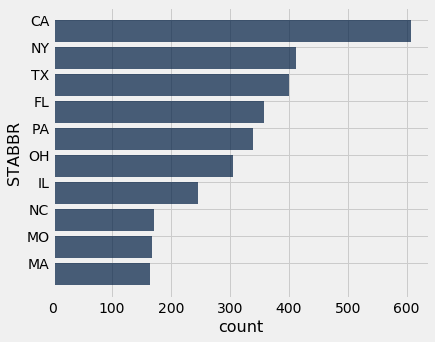

In [14]:
schools.group('STABBR').sort('count', descending=True).take(range(10)).barh('STABBR')

Unsurprisingly, populous states have more colleges. The file `data/population-2017.csv` contains state population estimates for 2017 from the census bureau. Using these estimates, calculate the number of college students per capita of each state. Specifically, answer the following:

**Question 8.** Create a table named `state_stats` consisting of columns `STATE`, `POP`, and `PER_CAPITA`, containing:
* the values of `STABBR`,
* the population of each value of `STABBR`,
* the number of undergraduate students per capita for each value of `STABBR`.
    
*Remark*: Use the simplifying assumption that students are contained in the census estimate. Is this assumption reasonable?

*Hint*: If you're struggling, refer to the census example from lecture that calculated the female:male ratio by age.

In [15]:
state_pops = Table.read_table('data/population-2017.csv').sort('STATE').column('POP')
state_counts = schools.group('STABBR', sum).sort('STABBR').column('UGDS sum')

state_stats = Table().with_columns(
    'STATE', schools.group('STABBR').sort('STABBR').column('STABBR'),
    'POP', state_pops,
    'PER_CAPITA', state_counts / state_pops
)
state_stats

STATE,POP,PER_CAPITA
AK,739795,0.0275455
AL,4874747,0.0499889
AR,3004279,0.04228
AS,55599,0.0224105
AZ,7016270,0.0662204
CA,39536653,0.0575136
CO,5607154,0.0473718
CT,3588184,0.0448631
DC,693972,0.0689754
DE,961939,0.0489127


In [23]:
_ = ok.grade('q1_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 9.** Among the states with over 500,000 residents, which has the most college students per capita? What percentage of that state's population are college students? (Your answer should be between 0-100%)

In [16]:
top_state_stats = state_stats.where('POP', are.above(500000)).sort('PER_CAPITA', descending=True).drop('POP').take(0)
top_state_stats

STATE,PER_CAPITA
UT,0.0798953


In [17]:
most_per_capita_state = top_state_stats.column('STATE').item(0)
most_per_capita_pct = top_state_stats.column('PER_CAPITA').item(0) * 100

In [26]:
_ = ok.grade('q1_9')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Cost of college: tuition, student debt, and future earning

```
NPT4                   Average net price for Title IV institutions
NPT41                  Average net price for $0-$30,000 family income
NPT42                  Average net price for $30,001-$48,000 family income
NPT43                  Average net price for $48,001-$75,000 family income
NPT44                  Average net price for $75,001-$110,000 family income
NPT45                  Average net price for $110,000+ family income
MD_EARN_WNE_P10        Median earnings of students working and not enrolled 10 years after entry
GT_25K_P6              Share of students earning over $25,000/year (threshold earnings) 6 years after entry
GRAD_DEBT_MDN_SUPP     Median debt of completers, suppressed for n=30
RPY_3YR_RT_SUPP        3-year repayment rate, suppressed for n=30
```

### Goals of the section

One of the goals of creating the college scorecard was to add elements of schools' value to school rankings. This section looks at the cost of college for the typical student, as well as financial implications of graduating from college. A few comments on the new fields (with descriptions given above):
* `NPT4` columns include the net price students pay to go to college (including cost-of-living).
* `NPT41,NPT42,NPT43,NPT44,NPT45` describe the cost of college for the given income quintile to which the student (or her family) belongs.
* `MD_EARN_WNE_P10` lists the median earning of students 10 years after entry. The effect of measuring earnings 10 years after entry gives approximation of what someone will make throughout their life.
* These columns have a value of `-1` if the entry was not recorded. Don't forget to exclude these values if required!

General questions to ask:
1. What is the cost of college versus a student's future earnings? Where should you go for a "good deal"?
2. How much of a problem is the "student loan default epidemic". Can we conclude that certain colleges are complicit?

Read in the financials data into a table called `financials`. 

In [18]:
financials = Table.read_table('data/csc_financials.csv')
financials

UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,RPY_3YR_RT_SUPP,GT_25K_P6,NPT4
100654,Alabama A & M University,Normal,AL,3,1,4616,0,0,0.0065,0.7039,0.7667,29900,35000,0.24585,0.453,15567
100663,University of Alabama at Birmingham,Birmingham,AL,3,1,12047,0,0,0.0179,0.3525,0.5179,40200,21500,0.519911,0.669,16475
100690,Amridge University,Montgomery,AL,3,2,293,1,1,0,0.6971,0.8436,40100,23000,0.2331,0.658,10155
100706,University of Alabama in Huntsville,Huntsville,AL,3,1,6346,0,0,0.0303,0.2949,0.4312,45600,23500,0.549003,0.685,19423
100724,Alabama State University,Montgomery,AL,3,1,4704,0,0,0.0159,0.7815,0.8113,26700,32091,0.196354,0.393,15037
100751,The University of Alabama,Tuscaloosa,AL,3,1,31663,0,0,0.0192,0.1938,0.4007,42700,23750,0.591143,0.695,21676
100760,Central Alabama Community College,Alexander City,AL,2,1,1492,0,0,0.002,0.5109,0.3234,27200,9388,0.263502,0.466,9128
100812,Athens State University,Athens,AL,3,1,2888,0,0,0.001,0.4219,0.6455,38500,18534,0.494246,0.653,-1
100830,Auburn University at Montgomery,Montgomery,AL,3,1,4171,0,0,0.0412,0.4405,0.5565,33500,22192.5,0.41627,0.616,15053
100858,Auburn University,Auburn,AL,3,1,22095,0,0,0.0214,0.1532,0.328,47100,21500,0.731667,0.741,21984


**Question 1.** What are the mean values for "median future earning" of students across all possible values of `PREDDEG` and `CONTROL`?

*Remark 1*: For example, assign to `median_earn_preddeg_2` the average value of `MD_EARN_WNE_P10` for schools with `PREDDEG` equal to 2.

*Remark 2*: Don't forget to filter out cases of non-report income (values of -1)!

In [19]:
filtered_earn = financials.where('MD_EARN_WNE_P10', are.above_or_equal_to(0))

median_earn_preddeg_1 = filtered_earn.where('PREDDEG', 1).column('MD_EARN_WNE_P10').mean()
median_earn_preddeg_2 = filtered_earn.where('PREDDEG', 2).column('MD_EARN_WNE_P10').mean()
median_earn_preddeg_3 = filtered_earn.where('PREDDEG', 3).column('MD_EARN_WNE_P10').mean()

median_earn_control_1 = filtered_earn.where('CONTROL', 1).column('MD_EARN_WNE_P10').mean()
median_earn_control_2 = filtered_earn.where('CONTROL', 2).column('MD_EARN_WNE_P10').mean()
median_earn_control_3 = filtered_earn.where('CONTROL', 3).column('MD_EARN_WNE_P10').mean()

In [29]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** Plot the previous values in a bar chart with one-liners (*hint*: use `group(col, np.mean)` to calculate all the means at once).

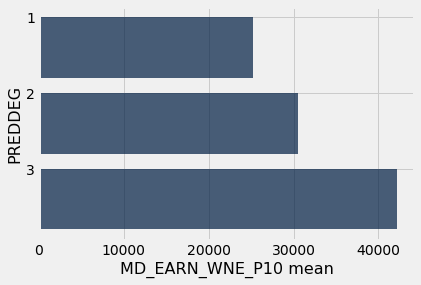

In [20]:
filtered_earn.select('PREDDEG', 'MD_EARN_WNE_P10').group('PREDDEG', np.mean).barh('PREDDEG')

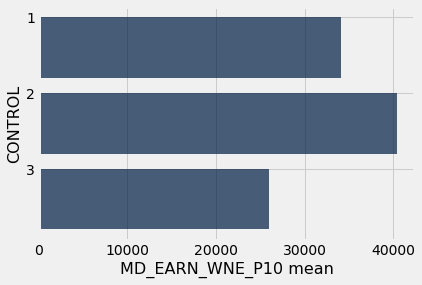

In [21]:
filtered_earn.select('CONTROL', 'MD_EARN_WNE_P10').group('CONTROL', np.mean).barh('CONTROL')

### Cost of college vs. future earnings

Different colleges cater to different economic segments of the population. On the one had, there exist low-cost trade schools consisting of 1-year certificate programs targeting low earning occupations. On the other hand, there are very expensive 4-year universities that train students intending to work in high-earning fields. The following question attempts to balance the cost of college with their students' future earning.

Create a column called `cost_to_earning` computed by dividing the values in `NPT4` by the values in `MD_EARN_WNE_P10`. A reasonable expectation someone might have is that the yearly cost of attending college should be less than their yearly earnings -- call schools that fail to meet this requirement *expensive schools*.

**Question 2.** Among expensive schools, what percentage are for-profit? public? private non-profit? (Give your answer as a percentage between 0-100, rounded to the nearest percent).

*Remark*: Don't forget to filter out -1 values!

In [22]:
expensive = (
    financials
    .with_column('cost_earning_ratio', financials.column('NPT4') / financials.column('MD_EARN_WNE_P10'))
    .where('NPT4', are.not_equal_to(-1))
    .where('MD_EARN_WNE_P10', are.not_equal_to(-1))
    .where('cost_earning_ratio', are.above(1))
    .group('CONTROL')
)
expensive

CONTROL,count
1,2
2,53
3,235


In [23]:
expensive.with_column('Percentage', np.round(expensive.column('count') / expensive.column('count').sum() * 100))

CONTROL,count,Percentage
1,2,1
2,53,18
3,235,81


In [24]:
expensive_for_profit_pct = 81
expensive_public_pct = 1
expensive_private_pct = 18

In [35]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The scatterplot function takes two optional arguments that help provide a lot more context than a plain scatterplot. Given a table `tbl` with numeric columns `c1`,`c2` to be plotted, you can control the size and color of the dots in the plot using the `sizes` and `colors` keyword arguments. The `alpha` keyword is a float between 0 and 1 that controls the opacity of the dots. See the code sample below for usage.

In [25]:
tbl = Table().with_columns(
    'c1', np.random.randn(500),
    'c2', np.random.randn(500),
    'size_col', np.random.randint(0,10000,500),
    'color_col', np.random.choice(['label_1', 'label_2', 'label_3'], 500)
)
tbl

c1,c2,size_col,color_col
0.319155,0.328907,1629,label_1
2.3406,-0.231687,7817,label_1
0.30931,0.530516,6584,label_1
-0.360618,-0.473937,5759,label_3
0.924945,0.0608447,7991,label_3
0.632233,1.33416,8234,label_2
-1.77738,0.349535,5571,label_3
-1.55087,-0.2024,4014,label_3
-0.593135,1.19864,2458,label_3
0.601411,-1.15792,2227,label_3


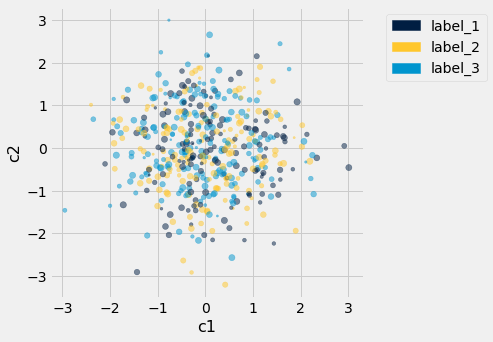

In [26]:
tbl.scatter('c1', 'c2', sizes='size_col', colors='color_col', alpha=0.5)

**Optional:** Plot scatterplots of `NPT4` against `MD_EARN_WNE_P10`, making the size of the dots proportional to the size of the school (`UGDS`) and using the values of either `PREDDEG` or `CONTROL` to color the dots. Be sure to filter out negative values of `NPT4` and `MD_EARN_WNE_P10`.

* What do the different quadrants of the plot reflect about a school's value?
* What can you say about the value of schools for different values of `PREDDEG`? of different values of `CONTROL`? Investigate interesting outliers.
* What do these scatterplots say about different types of public schools? (you may want to filter the plot to display only public schools).

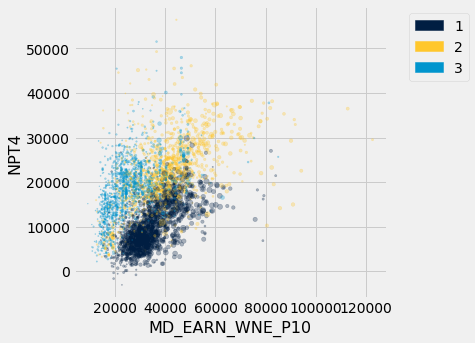

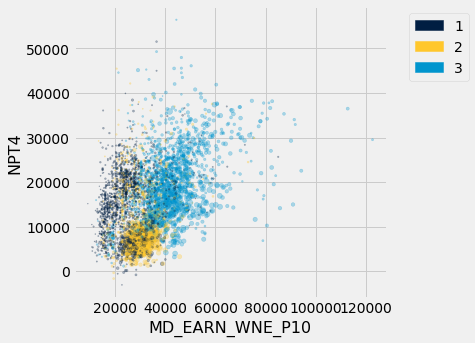

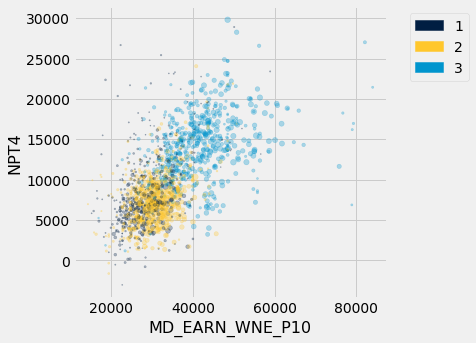

In [27]:
to_plot_earning = financials.where('NPT4', are.not_equal_to(-1)).where('MD_EARN_WNE_P10', are.not_equal_to(-1))
to_plot_earning.scatter('MD_EARN_WNE_P10', 'NPT4', colors='CONTROL', alpha=.3, sizes='UGDS')
to_plot_earning.scatter('MD_EARN_WNE_P10', 'NPT4', colors='PREDDEG', alpha=.3, sizes='UGDS')
to_plot_earning.where('CONTROL', 1).scatter('MD_EARN_WNE_P10', 'NPT4', colors='PREDDEG', alpha=.3, sizes='UGDS')

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Public schools break up into "community colleges" and "4 year institutions" in the plot above. More advanced degrees are more expensive but are associated with higher earnings.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

### Future earnings

**Question 3.** Which school located in La Jolla, CA has the highest median earning? By how many dollars does the school exceed the second place school?

In [28]:
financials.where('CITY', 'La Jolla')

UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,RPY_3YR_RT_SUPP,GT_25K_P6,NPT4
110680,University of California-San Diego,La Jolla,CA,3,1,28121,0,0,0.192,0.3534,0.3534,58600,18500,0.816682,0.729,14775
119605,National University,La Jolla,CA,3,2,7982,0,0,0.0085,0.3512,0.3538,58300,28642,0.498604,0.772,22652


In [29]:
lj_school_with_highest_earning = 'University of California-San Diego'
amt_exceeding_second_place = 300

In [41]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** Is the difference between the median incomes surprising? Why are the numbers as close as they are? Can you surmise why the the repayment rate differs between the schools?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

I would have expected UCSD to have higher median incomes than National, as UCSD is a highly ranked school, whereas National University is a small regional private school. One possibility for the small difference in incomes of their graduates:
* National only offers a few specialized career-oriented majors that are typically associated with higher salaries, whereas UCSD offers many academic degrees not associated to any one career path (e.g. English, Philosophy).

The difference in the lower repayment rate at National University could be connected to the higher amount of debt each student leaves with. It could also be connected to school policies aggressively pushing loans, as well as the differing economic backgrounds of their student bodies.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

### Optional: Federal loan defaults: are for-profit colleges to blame?

Much has been made of the high-default rates of for-profit colleges. Governmental investigations have painted a picture of for-profit colleges existing primarily to siphon off federal student loan money, leaving the students with few learned skills and future bad credit from loan default.

In [42]:
# Before answering the questions in this section, you might want to do the following to 
# get a better feeling for the data:

# Create columns for total amount of defaults / total amount loaned (these are approximate!).
# What's the total amount of student debt defaulted on? Whats the total default rate?
# Calculate group(CONTROL, np.sum) to sum total defaults/amt loaned by CONTROL. 
# What's the total $ by default per control? What's the default rate by CONTROL?

In [43]:
# Plot pct_loan by default rate scatter plots -- understand the quadrants and look into outliers.

In [44]:
to_plot_loans = financials.where('RPY_3YR_RT_SUPP', are.not_equal_to(-1)).where('PCTFLOAN', are.not_equal_to(-1))

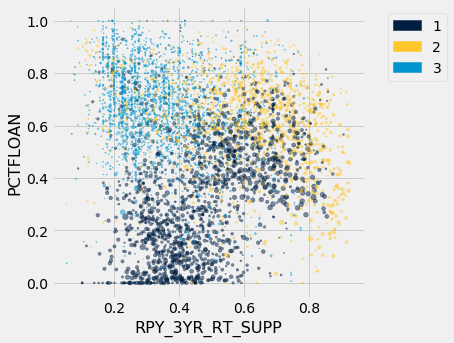

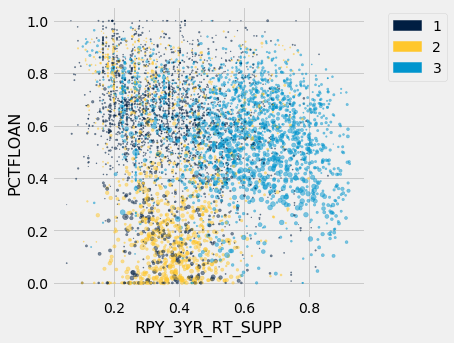

In [45]:
to_plot_loans.scatter('RPY_3YR_RT_SUPP', 'PCTFLOAN', colors='CONTROL', alpha=0.5, sizes='UGDS')
to_plot_loans.scatter('RPY_3YR_RT_SUPP', 'PCTFLOAN', colors='PREDDEG', alpha=0.5, sizes='UGDS')

### Growth in cost of college across income quintiles

The file `data/csc_cost_growths.csv` contains information on the price of school across the different income quintiles. Colleges with a large difference between cost of attendence for students with varying income is indicative of a school's ability to offer support to students of need (as well as the size of the school's endowment).

First, load the data into a table called `growth`.

In [46]:
growth = Table.read_table('data/csc_cost_growths.csv')
growth

UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN,NPT41,NPT42,NPT43,NPT44,NPT45
100654,Alabama A & M University,Normal,AL,3,1,4616,0,0,0.0065,0.7039,0.7667,15043,15491,17335,19562,18865
100663,University of Alabama at Birmingham,Birmingham,AL,3,1,12047,0,0,0.0179,0.3525,0.5179,13849,15385,18022,18705,19319
100690,Amridge University,Montgomery,AL,3,2,293,1,1,0,0.6971,0.8436,10155,-1,-1,-1,-1
100706,University of Alabama in Huntsville,Huntsville,AL,3,1,6346,0,0,0.0303,0.2949,0.4312,15971,18016,20300,21834,22059
100724,Alabama State University,Montgomery,AL,3,1,4704,0,0,0.0159,0.7815,0.8113,14111,15140,17492,19079,18902
100751,The University of Alabama,Tuscaloosa,AL,3,1,31663,0,0,0.0192,0.1938,0.4007,18686,20013,22425,23666,24578
100760,Central Alabama Community College,Alexander City,AL,2,1,1492,0,0,0.002,0.5109,0.3234,8882,8647,11681,11947,13868
100812,Athens State University,Athens,AL,3,1,2888,0,0,0.001,0.4219,0.6455,-1,-1,-1,-1,-1
100830,Auburn University at Montgomery,Montgomery,AL,3,1,4171,0,0,0.0412,0.4405,0.5565,13480,14114,16829,17950,17022
100858,Auburn University,Auburn,AL,3,1,22095,0,0,0.0214,0.1532,0.328,15591,19655,23286,24591,25402


**Question 4** Next, create a new table `growth_with_discount` that contains an additional column called `pct_discount` that gives the percent discount given to an average student in the first quintile versus the fifth quintile. Assign the name of the institution that gives the biggest discount to the name `biggest_discount_school`.
* The answer should be a percentage between 0-100.
* Filter out negative numbers in the given columns!

In [47]:
growth_temp = growth.where('NPT45', are.above(0)).where('NPT41', are.above(0))
pct_discount = (growth_temp.column('NPT45') - growth_temp.column('NPT41')) / growth_temp.column('NPT45') * 100

growth_with_discount = (
    growth_temp
    .with_column('pct_discount', pct_discount)
    .where('pct_discount', are.between_or_equal_to(0, 100))
)
growth_with_discount.sort('pct_discount', descending=True)


UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN,NPT41,NPT42,NPT43,NPT44,NPT45,pct_discount
187912,New Mexico Military Institute,Roswell,NM,2,1,422,0,0,0.1137,0.2967,0.1752,141,1744,5692,9028,6828,97.935
234207,Washington and Lee University,Lexington,VA,3,2,1820,0,0,0.039,0.0917,0.2039,920,1789,8962,18436,34627,97.3431
138682,Albany Technical College,Albany,GA,1,1,2849,0,0,0.0004,0.7712,0.6908,308,1324,3211,6361,7841,96.0719
243744,Stanford University,Stanford,CA,3,2,7032,0,0,0.091,0.1537,0.1031,1630,4035,4061,12228,39853,95.91
168342,Williams College,Williamstown,MA,3,2,2044,0,0,0.0793,0.1859,0.269,1910,3871,10448,19245,42003,95.4527
156295,Berea College,Berea,KY,3,2,1612,0,0,0.0757,0.8326,0.1814,2175,3101,6805,21765,34980,93.7822
144050,University of Chicago,Chicago,IL,3,2,5978,0,0,0.1208,0.109,0.1871,2551,2665,4536,12069,37066,93.1177
166027,Harvard University,Cambridge,MA,3,2,7447,0,0,0.112,0.1145,0.0355,3294,1665,6577,11222,44238,92.5539
186131,Princeton University,Princeton,NJ,3,2,5236,0,0,0.1194,0.1527,0.0452,2469,2705,4557,12614,32706,92.4509
115296,Grossmont College,El Cajon,CA,2,1,16630,0,0,0.032,0.2434,0.0179,623,1806,4146,6559,7792,92.0046


In [48]:
biggest_discount_school = 'New Mexico Military Institute'

In [49]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** plot a histogram of `pct_discount`. Who are the schools with large difference in price, compared to the majority of schools?

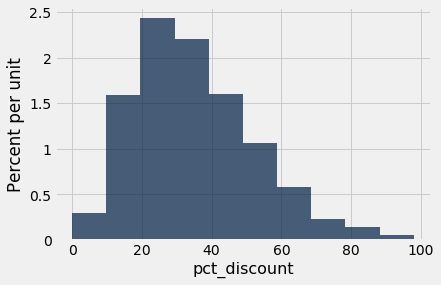

In [50]:
growth_with_discount.hist('pct_discount')

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

These are largely schools with large endowments -- i.e. rich schools -- like Ivy League institutions. Their sticker price is a lot of money, but they offer many need-based scholarships.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

## 3. SAT scores and graduation rates

```
SATMID                 Midpoint of SAT scores at the institution
SAT_AVG                Average SAT equivalent score of students admitted
C150_4_POOLED_SUPP     Completion rate for first-time, full-time students at four-year institutions
```

The file `data/csc_sat_scores.csv` contains information on the school's SAT scores (admitted and attending students), as well as school's graduation rates (finishing in 6 years). This data includes *only* schools that predominantly award bachelor degrees.

### Goals of the section:

* Understand the gap between the SAT scores of who a school admits versus the students attending the school.
* Understand the association between completion rates and the SAT scores of their students.

Load the SAT data into a table called `sat`

In [30]:
sat = Table.read_table('data/csc_sat_scores.csv')
sat

UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN,SAT_AVG,C150_4_POOLED_SUPP,SATMID
100654,Alabama A & M University,Normal,AL,3,1,4616,0,0,0.0065,0.7039,0.7667,849,0.2913,845
100663,University of Alabama at Birmingham,Birmingham,AL,3,1,12047,0,0,0.0179,0.3525,0.5179,1125,0.5384,1135
100706,University of Alabama in Huntsville,Huntsville,AL,3,1,6346,0,0,0.0303,0.2949,0.4312,1257,0.4905,1200
100724,Alabama State University,Montgomery,AL,3,1,4704,0,0,0.0159,0.7815,0.8113,825,0.2475,825
100751,The University of Alabama,Tuscaloosa,AL,3,1,31663,0,0,0.0192,0.1938,0.4007,1202,0.6793,1105
100830,Auburn University at Montgomery,Montgomery,AL,3,1,4171,0,0,0.0412,0.4405,0.5565,1009,0.2207,935
100858,Auburn University,Auburn,AL,3,1,22095,0,0,0.0214,0.1532,0.328,1217,0.74,1160
100937,Birmingham Southern College,Birmingham,AL,3,2,1289,1,0,0,0.1888,0.4729,1150,0.6439,1085
101189,Faulkner University,Montgomery,AL,3,2,2297,1,0,0.0244,0.4727,0.6954,972,0.2683,1000
101435,Huntingdon College,Montgomery,AL,3,2,1140,1,0,0.0018,0.4425,0.7093,1001,0.3996,948


Create a column in the table `sat` called `SAT_DIFF` that consists of the difference between the average SAT score of admitted students and the midpoint SAT score of enrolled students.

**Question 1.** What is the average value of `SAT_DIFF`? What is the average value of `SAT_DIFF` among schools with greater than a 1400 SAT score?

In [31]:
sat_diff = sat.with_column('SAT_DIFF', sat.column('SAT_AVG') - sat.column('SATMID'))
avg_sat_diff = sat_diff.column('SAT_DIFF').mean()
avg_sat_diff_above_1400 = sat_diff.where('SATMID', are.above(1400)).column('SAT_DIFF').mean()

In [53]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** Plot a scatterplot of `SATMID` against `SAT_DIFF`. Which shcools have the largest/smallest difference in `SAT_DIFF`? Do schools with high SAT scores tend toward positive or negative `SAT_DIFF`? Why might this be the case?

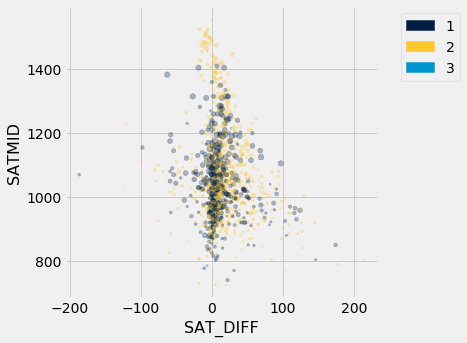

In [32]:
sat_diff.scatter('SAT_DIFF', 'SATMID', colors='CONTROL', sizes='UGDS', alpha=0.3)

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Schools with high SAT scores tend toward negative `SAT_DIFF`. This is because schools with high SAT standards tend to attract the smarter students with high SAT scores.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

### Completion rates and SAT scores

Plot a scatterplot of `SATMID` against `C150_4_POOLED_SUPP`. Notice the following two observations:
* There is a positive association between `SATMID` and `C150_4_POOLED_SUPP`.
* The variation in graduation rates is smaller for *higher* SAT scores and larger for *lower* SAT scores.

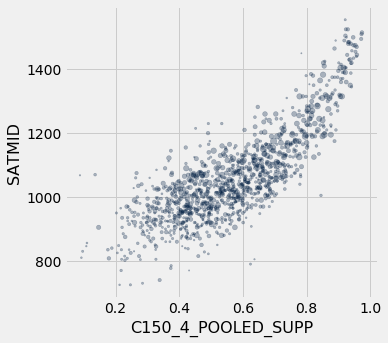

In [33]:
# scatterplot
sat.scatter('C150_4_POOLED_SUPP', 'SATMID', sizes='UGDS' ,alpha=0.3)

**Optional:** Why might this association exist? Do you think it is a causal association? If no, identify possible confounders.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

This association may exist because those who did well on their SATs are more academically prepared and thus are more likely graduate on time. One confounder is economic background of the students: students with more economic resources tend to do better on the SATs, so a school that focuses on educating underrepresented student populations will tend to have lower SAT scores, no matter how good the school is.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

This question attempts to identify differences in schools with different completion rates that have similar average SAT scores. 

**Question 2.** Compute the mean and standard deviation the completion rates of schools with average SAT scores between, or equal to, 1000 and 1100. Call these amounts `m` and `s` respectively.

*Hint*: numpy has a standard deviation function, `np.std`.

In [56]:
m = np.mean(
    sat
    .where('SATMID', are.between_or_equal_to(1000, 1100))
    .column('C150_4_POOLED_SUPP')
)

s = np.std(
    sat
    .where('SATMID', are.between_or_equal_to(1000, 1100))
    .column('C150_4_POOLED_SUPP')
)

In [57]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** In this question, consider only schools with an average SAT score bewteen, or equal to, 1000 and 1100. Calculate the following ratios and assign them to the variables below:
1. What is the ratio of public-to-private schools among schools with completion rates above `m + s` (i.e. high completion rates)?
2. What is the ratio of public-to-private schools among schools with completion rates below `m - s` (i.e. low completion rates)?

In [58]:
(
    sat
    .where('SATMID', are.between_or_equal_to(1000, 1100))
    .where('C150_4_POOLED_SUPP', are.above(m + s))
    .group('CONTROL')
)

CONTROL,count
1,19
2,52


In [59]:
(
    sat
    .where('SATMID', are.between_or_equal_to(1000, 1100))
    .where('C150_4_POOLED_SUPP', are.below(m - s))
    .group('CONTROL')
)

CONTROL,count
1,42
2,24


In [60]:
ratio_high_completion = 19 / 52
ratio_low_completion = 42 / 24

In [61]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Optional:** If you had an SAT score between 1000 and 1100, would you rather go to a private school or a public school? (All other factors aside). Do you think this link is casual? What are possible confounders? Can you think of any other possible conditions to analyze to adjust for those confounders?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

This link is not causal. A confounder would be the difficulty to complete a degree in time at a particular school (e.g. private schools suffering from grade inflation). Another confounder would be wealth (the wealthy have more resources to help them graduate on time; they also tend to choose private schools).

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

### SAT Scores and student financials

There has been extensive research on the correlation between student SAT scores and family income. Wealthy families can afford expensive SAT preparation services, while success at the SAT is affected by test-taking strategies as well academic preparation. Hence, while a school's average SAT score is often used as a measure of academic quality, it confounded by the economic makeup of the school's student-body.

[Federal Pell grants](https://studentaid.ed.gov/sa/types/grants-scholarships/pell) are need-based grants (not loans) available to undergraduate students. The percentage of a school's student-body receiving Pell grants (`PCTPELL`) gives a glimpse at the economic backgrounds of the student-body.

Below, display a scatterplot of `SATMID` against `PCTPELL`.

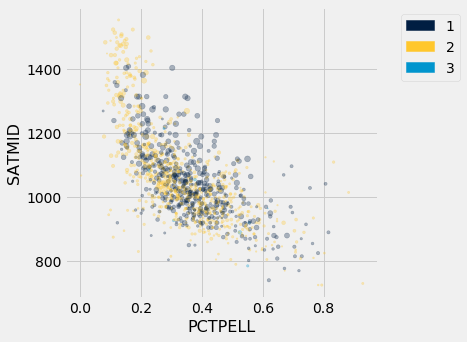

In [34]:
# scatter plot
sat.scatter('PCTPELL', 'SATMID', colors='CONTROL', sizes='UGDS', alpha=0.3)

**Question 4.** Among schools with average SAT scores above 1400, which school has the largest proportion of Pell grants? Assign the institution name to the variable `highest_pell_grants` below.

In [63]:
sat.where('SATMID', are.above(1400)).sort('PCTPELL', descending=True).take(range(5))

UNITID,INSTNM,CITY,STABBR,PREDDEG,CONTROL,UGDS,RELAFFIL,DISTANCEONLY,UGDS_NRA,PCTPELL,PCTFLOAN,SAT_AVG,C150_4_POOLED_SUPP,SATMID
110635,University of California-Berkeley,Berkeley,CA,3,1,29309,0,0,0.1287,0.3031,0.26,1422,0.9165,1405
197133,Vassar College,Poughkeepsie,NY,3,2,2400,0,0,0.0758,0.2394,0.3811,1409,0.9086,1415
164465,Amherst College,Amherst,MA,3,2,1846,0,0,0.0937,0.2334,0.1655,1451,0.9423,1458
190150,Columbia University in the City of New York,New York,NY,3,2,8124,0,0,0.162,0.2244,0.2274,1496,0.9465,1500
153384,Grinnell College,Grinnell,IA,3,2,1657,0,0,0.1835,0.2164,0.4211,1410,0.8573,1425


In [64]:
highest_pell_grants = 'University of California-Berkeley'

In [65]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**You're finished!** Congratulations on mastering data visualization and table manipulation. Time to submit.

In [66]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [67]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Submission successful for user: dhl011@ucsd.edu
URL: https://okpy.org/ucsd/dsc10/fa18/project01/submissions/vo697V



## No submission to Gradescope this week!

As mentioned in the instructions, the short answer questions are optional and ungraded, so you don't need to submit a PDF of this notebook to Gradescope. However, doing the short answer questions is excellent practice for the midterm, and we will post solutions to them immediate after the project's due date.